![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [82]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [84]:
# look at the df summary information
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [85]:
# check for any missing values (no missing values)
penguins_df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [86]:
# look at the sex column distribution
penguins_df.sex.value_counts()

MALE      167
FEMALE    165
Name: sex, dtype: int64

In [87]:
# Convert the 'sex' column to numeric using .cat.codes
penguins_df['sex'] = penguins_df['sex'].astype('category').cat.codes
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [88]:
# look at the sex column distribution (1 for MALE ,0 for FEMALE)
penguins_df.sex.value_counts()

1    167
0    165
Name: sex, dtype: int64

In [89]:
# make all columns same Scale
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(penguins_df), columns=df.columns)
df_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


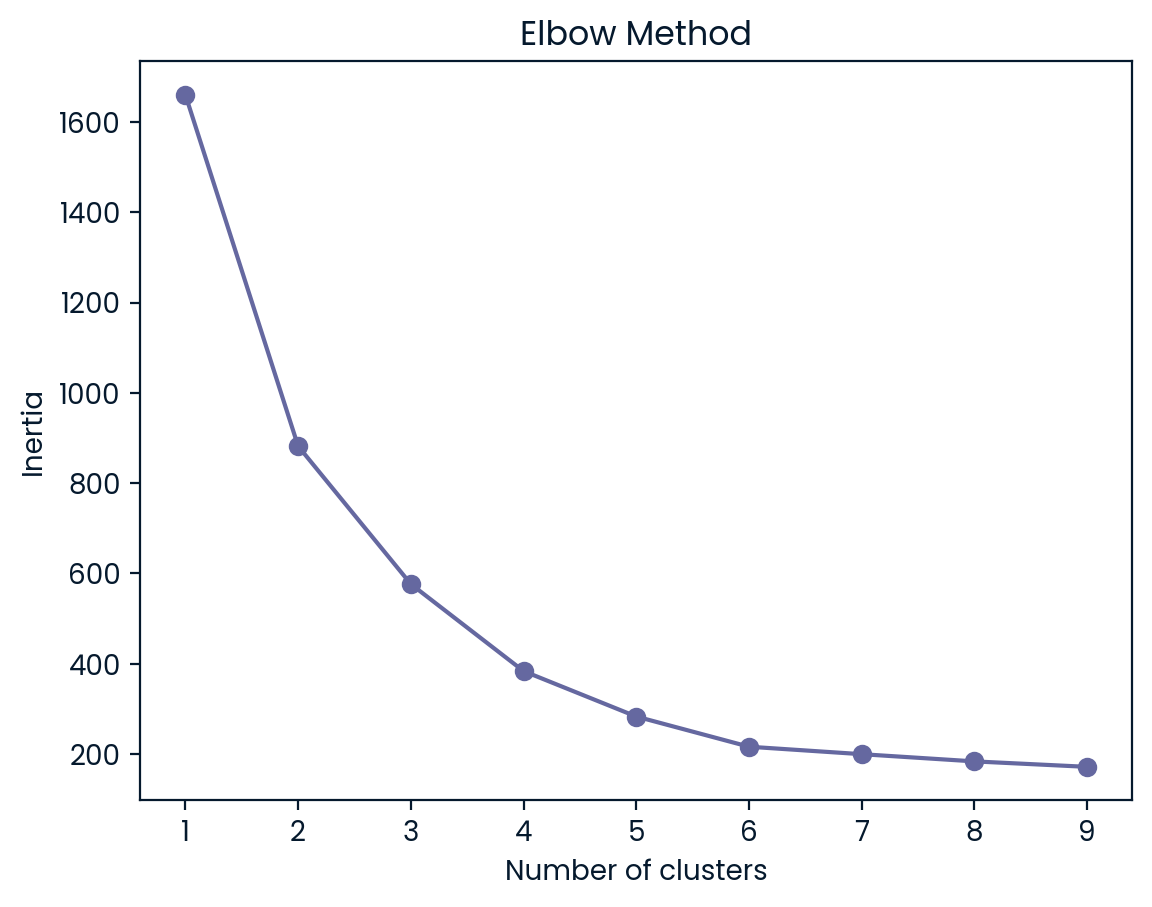

In [90]:
# Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [91]:
# from the above elbow method the best number of clusters is 4
num_clusters = 4

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

# Calculate the average values for each cluster
cluster_averages = df_scaled.groupby('cluster').mean()
cluster_averages

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
cluster,,,,,
0,-0.026226,1.000505,-0.443228,-0.248243,0.993994
1,0.283365,-1.489322,0.837042,0.587801,-1.006042
2,-0.698596,0.234097,-0.851183,-0.977856,-1.006042
3,1.001551,-0.733134,1.467381,1.587737,0.993994


In [92]:
# Reverse the scaling to get the original values
df_unscaled = pd.DataFrame(scaler.inverse_transform(df_scaled.drop(columns='cluster')), columns=df.columns)
df_unscaled['cluster'] = df_scaled['cluster']

# Calculate the mean of the original variables for each cluster
stat_penguins = df_unscaled.groupby('cluster').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
cluster,,,,,
0,43.878302,19.111321,194.764151,4006.603774,1.0
1,45.563793,14.237931,212.706897,4679.741379,0.0
2,40.217757,17.611215,189.046729,3419.158879,0.0
3,49.473770,15.718033,221.540984,5484.836066,1.0


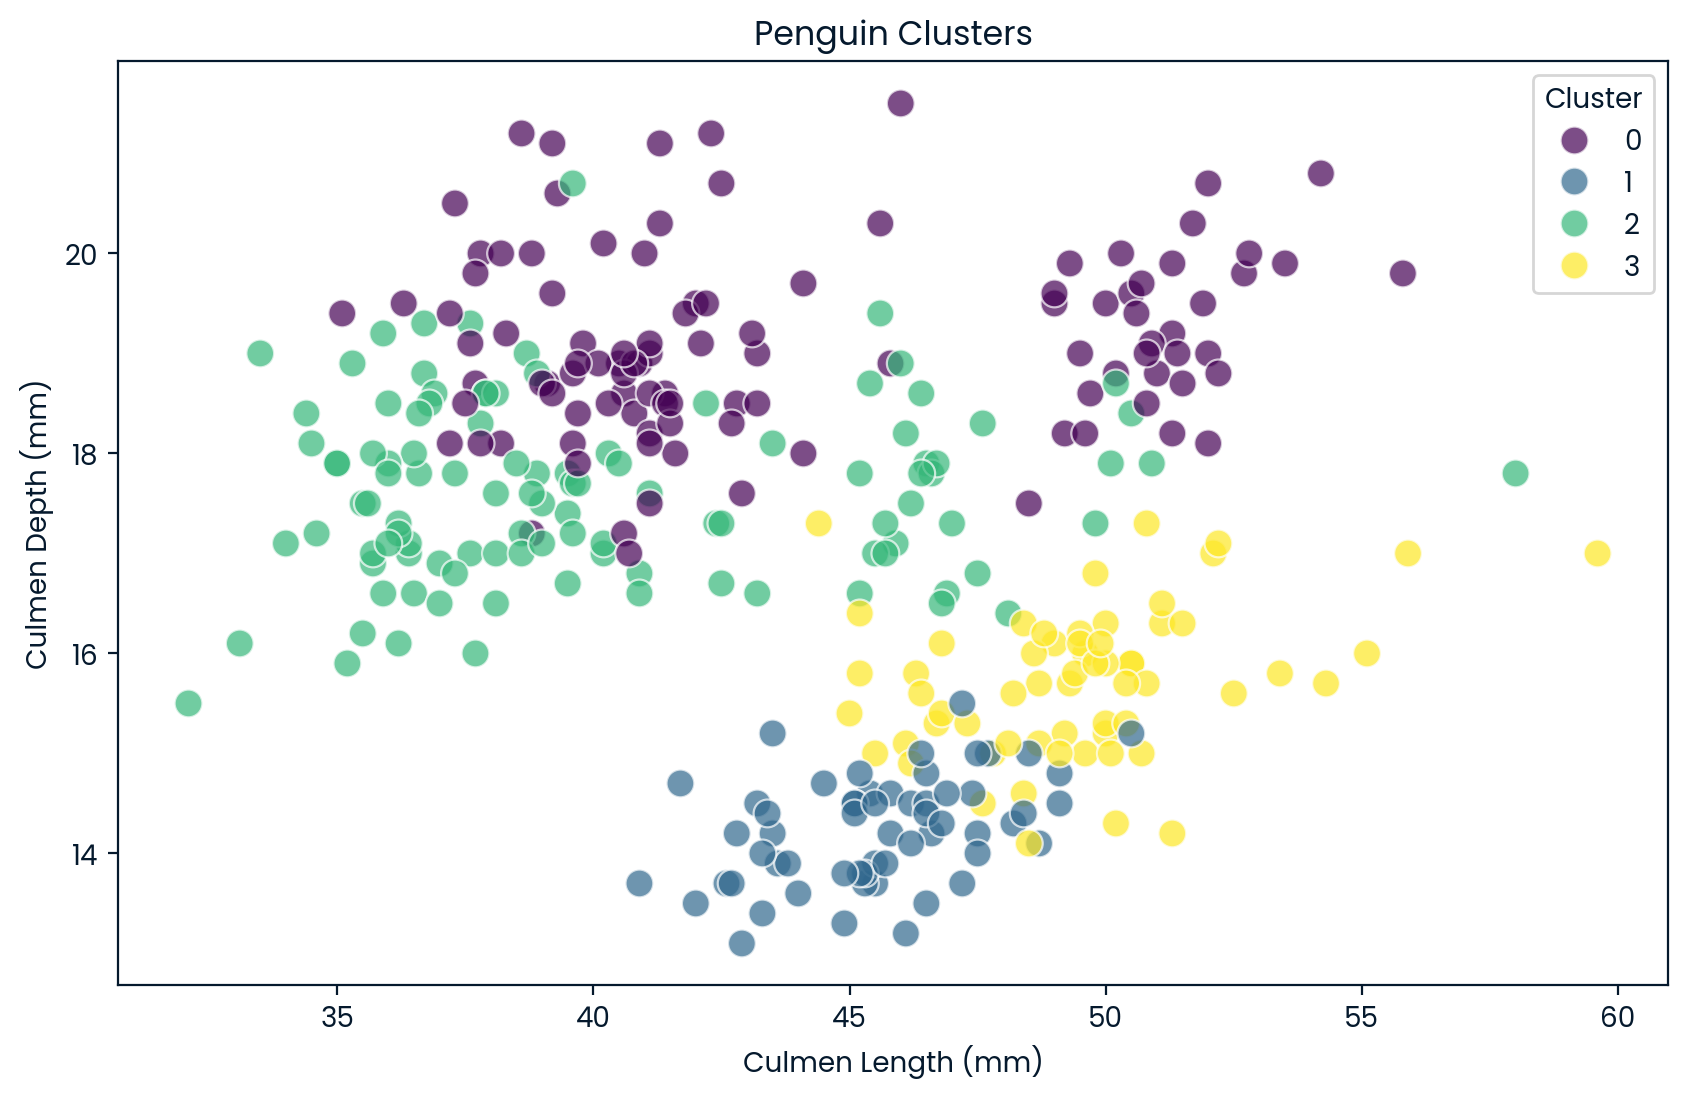

In [93]:
# Create a scatterplot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_unscaled, x='culmen_length_mm', y='culmen_depth_mm', hue='cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Penguin Clusters')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.legend(title='Cluster')
plt.show()